In [1]:
%matplotlib inline
import obspy
import io

# def

In [2]:
# inventory = obspy.read_inventory('fdsn-station_2021-06-29T11_00_50.xml', format="STATIONXML")
inventory = obspy.read_inventory('fdsn-station_2021-06-29T13_31_12.xml', format="STATIONXML")

In [3]:
path = '/media/sda/data/borehole/queryauth?net=7F&sta=A00&cha=GDH&starttime=2019-01-01&endtime=2021-01-01&format=miniseed&nodata=404'
reclen = 512
# chunksize = 100000 * reclen # Around 50 MB
chunksize = 100000 * reclen # Around 50 MB
with io.open(path, "rb") as fh:
    while True:
        with io.BytesIO() as buf:
            c = fh.read(chunksize)
            
            if not c:
                break
            buf.write(c)
            buf.seek(0, 0)
            st = obspy.read(buf)
            
        # Do something useful!
        print(st)
        break

1 Trace(s) in Stream:
7F.A00.01.GDH | 2019-05-01T04:30:17.998000Z - 2019-05-02T00:40:12.434000Z | 1000.0 Hz, 72594437 samples


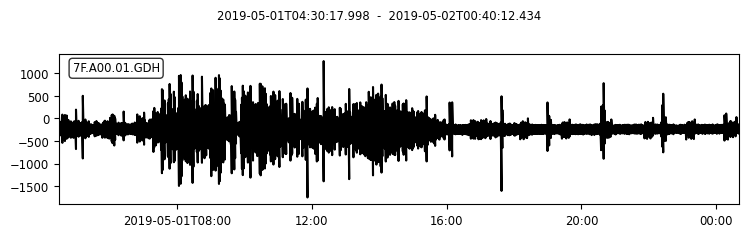

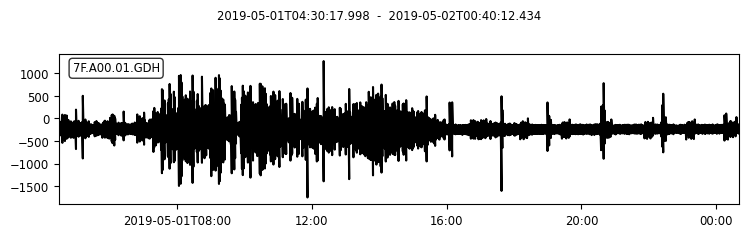

In [4]:
st.plot()

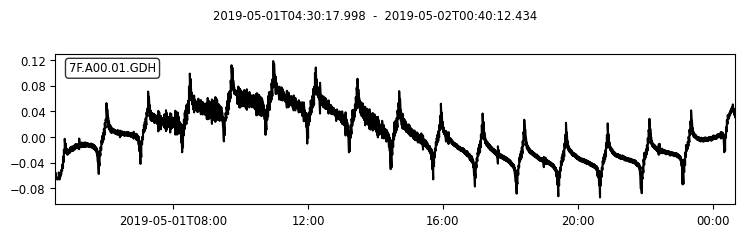

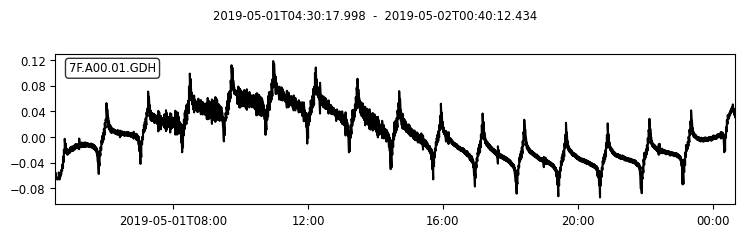

In [5]:
st.remove_response(inventory=inventory)
st.plot()

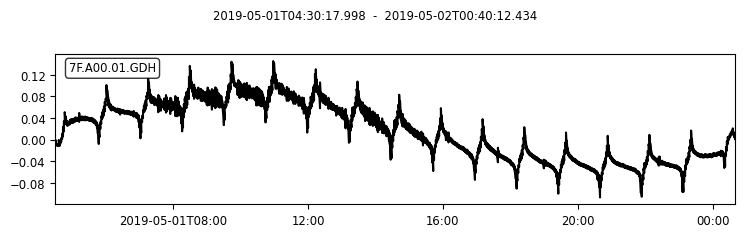

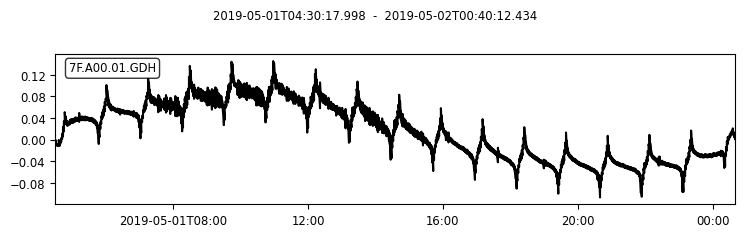

In [7]:
st.detrend()
st.plot()

In [9]:
inventory.get_response('7F.A00.01.GHD', datetime='2019-05-01T04:30:17.998000Z')

TypeError: get_response() missing 1 required positional argument: 'datetime'